In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_pickle('appReviews_dataset_after_rq1.pkl')

# Review Length

In [3]:
def count_length(list_):
    return len(list_)

df['ReviewLength'] = df['ReviewText'].str.split()
df['ReviewLength'] = df['ReviewLength'].apply(count_length)

In [4]:
df.head(3)

,AppId,AppScore,Price,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Genre,SubGenre,ReviewId,Username,ReviewText,Score,ThumbsUpCount,ReviewCreatedVersion,ReceivedReply,Time,ReviewTextTokenized,TextSentiment,ReviewLength
0,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOFmCWceVoFZy8SeT12c-I66JbSj0Nf7-hnVE4B...,Malesha Hasan,Excellent app to use. No problems.,5.0,0.0,105.0,False,2022-04-09 18:23:54,"[excellent, problems, use]",1.0,6
1,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOE7iZydz6Vu-dbOYpLejv8suWqfV0x9dVhIg05...,Melanie Zokem,Stronger Good but slow,5.0,0.0,104.0,False,2022-04-09 18:16:21,"[slow, good, stronger]",0.2,4
2,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOEzc9TbIqE7koJWizuWQy-ot_uB_od_CBQ3Tai...,JOHN JACOB,Submitted many times,5.0,0.0,105.0,False,2022-04-09 18:07:13,"[many, submitted, times]",0.5,3


In [5]:
#keeping the colors for genres consistent across all graphs
def set_genre_colors(df_,highlight):
    colors=[]
    for genre in df_['Genre']:
        if genre == highlight:
            colors.append('#A18DEB')
        else:
            colors.append('#A1DDFF')
    return colors

def set_score_colors(df_):
    colors=[]
    for score in df_['Score']:
        if score == 5:
            colors.append((0.2, 0.4, 0.8, 0.6))
        elif score == 4:
            colors.append((0.2, 0.8, 0.2, 0.6))
        elif score == 3:
            colors.append((0.8, 0.8, 0.2, 0.6))
        elif score == 2:
            colors.append((0.8, 0.5, 0.2, 0.6))
        else:
            colors.append((0.8, 0.2, 0.2, 0.6))
    return colors

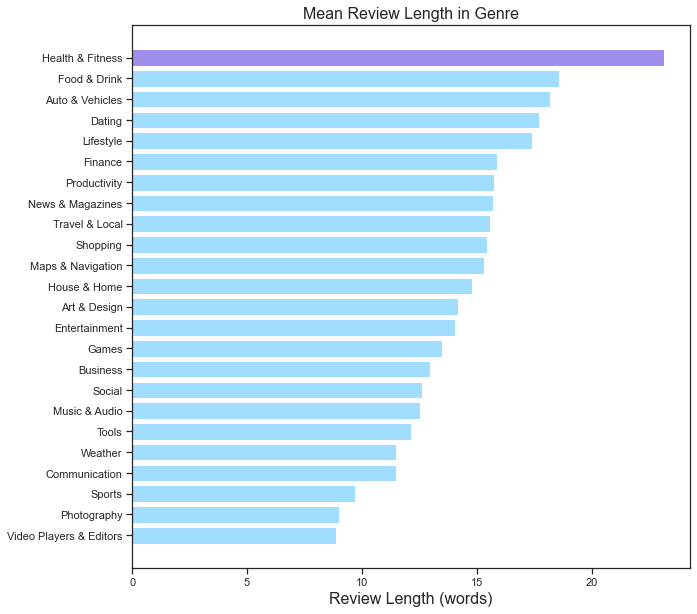

In [6]:
df_means = df.groupby('Genre').mean()
df_means = pd.DataFrame(df_means).reset_index()
df_means = df_means.rename(columns={'index':'Genre'})
df_means = df_means.sort_values('ReviewLength')

colors = set_genre_colors(df_means,'Health & Fitness')

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(df_means['Genre'], df_means['ReviewLength'], color=colors)
plt.title('Mean Review Length in Genre', fontsize=16)
plt.xlabel('Review Length (words)', fontsize=16)
plt.ylabel('', fontsize=16)

plt.show()

In [7]:
df_means

,Genre,AppScore,InAppProductPrice Low,InAppProductPrice High,Score,ThumbsUpCount,TextSentiment,ReviewLength
22,Video Players & Editors,3.723489,2.323580,25.845137,4.125445,4.504631,0.370253,8.862573
15,Photography,3.743936,1.864628,24.996935,4.163009,2.987131,0.380697,9.024579
19,Sports,3.754217,1.601430,37.040595,4.081515,3.139635,0.373488,9.682797
3,Communication,3.511467,0.814229,38.827868,3.887353,3.295756,0.311339,11.497752
23,Weather,4.215127,1.711685,13.016802,4.299462,2.188717,0.400909,11.499515
20,Tools,3.504088,1.491288,17.973802,4.019318,2.356367,0.334520,12.128083
13,Music & Audio,3.668623,1.590796,19.361641,4.138361,3.069053,0.361048,12.542548
18,Social,3.218719,1.930594,119.897014,3.660781,3.207420,0.274187,12.636489
2,Business,3.049313,1.626642,25.396185,3.759226,2.712427,0.313463,12.983040
8,Games,4.001948,1.455316,40.951500,4.088382,3.767949,0.160689,13.482682


# Review Length Correlation to Score and Sentiment

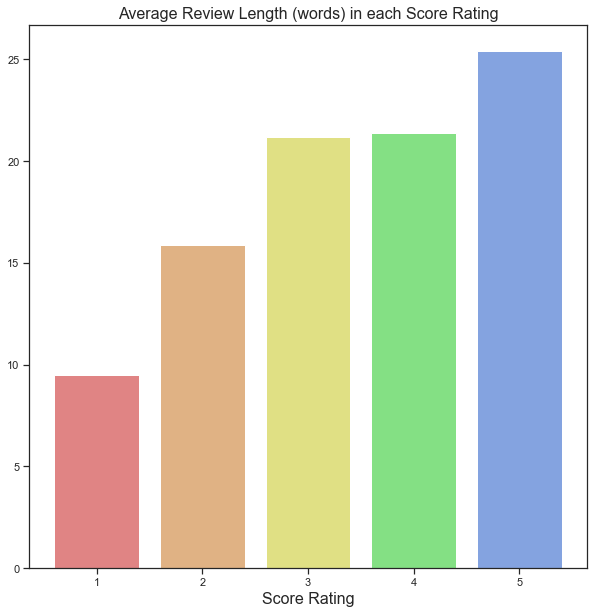

In [8]:
df_means = df.groupby('Score').mean()
df_means = pd.DataFrame(df_means).reset_index()
df_means = df_means.drop(df_means[df_means.Score == 0].index)
df_means = df_means.rename(columns={'index':'Score'})
df_means = df_means.sort_values('ReviewLength')

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar([1,2,3,4,5], df_means['ReviewLength'], color=[(0.8, 0.2, 0.2, 0.6),
                                                                        (0.8, 0.5, 0.2, 0.6),
                                                                        (0.8, 0.8, 0.2, 0.6),
                                                                        (0.2, 0.8, 0.2, 0.6),
                                                                        (0.2, 0.4, 0.8, 0.6)])


plt.title('Average Review Length (words) in each Score Rating', fontsize=16)
plt.xlabel('Score Rating', fontsize=16)
plt.ylabel('', fontsize=16)

plt.show()

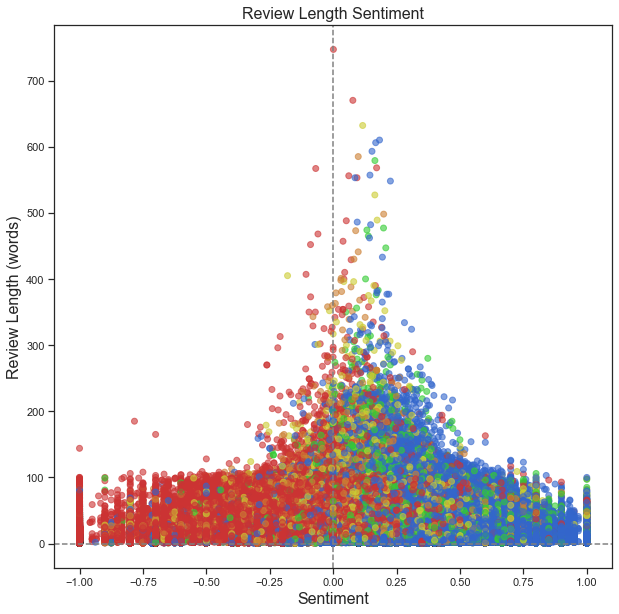

In [9]:
colors = set_score_colors(df)

# Scatter plot
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 10))
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.scatter(df['TextSentiment'],df['ReviewLength'],color=colors)
plt.title('Review Length Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Review Length (words)', fontsize=16)

plt.show()

# Review Likes to Length Correlation

Averaging the number of likes across the lengths of the reviews

In [10]:
df_likes = df.sort_values('ThumbsUpCount')
#df_likes['ReviewLength'] = round(df_likes['ReviewLength']/1) *1
df_likes = df_likes.groupby('ReviewLength')['ThumbsUpCount'].mean()
df_likes = pd.DataFrame(df_likes).reset_index()
df_likes = df_likes.rename(columns={'index':'ReviewLength'})
df_likes = df_likes.sort_values('ThumbsUpCount')

df_likes

,ReviewLength,ThumbsUpCount
342,381,0.000000
313,326,0.000000
274,277,0.000000
328,356,0.000000
333,365,0.000000
...,...,...
327,354,99.666664
271,272,122.000000
375,556,129.000000
351,405,172.000000


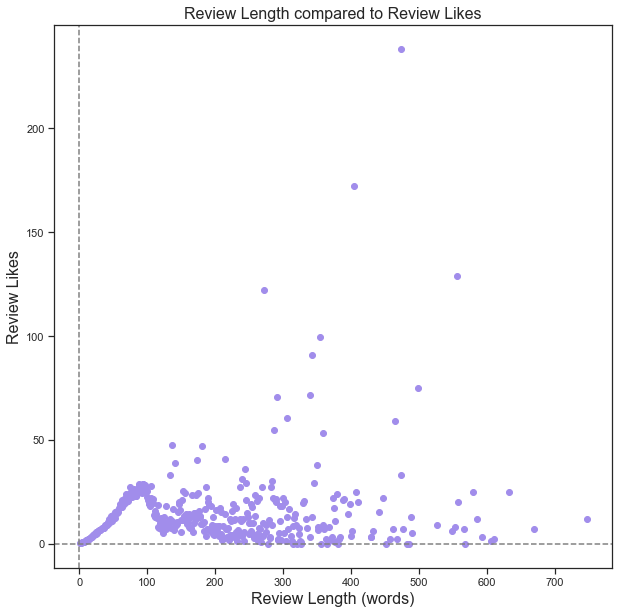

In [11]:
colors = '#A18DEB'

# Scatter plot
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 10))
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.scatter(df_likes['ReviewLength'],df_likes['ThumbsUpCount'],color=colors)
plt.title('Review Length compared to Review Likes', fontsize=16)
plt.xlabel('Review Length (words)', fontsize=16)
plt.ylabel('Review Likes', fontsize=16)
plt.show()

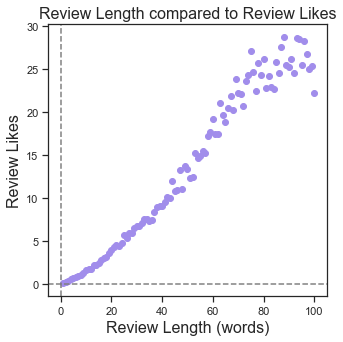

In [12]:
df_likes2 = df_likes.drop(df_likes[df_likes.ReviewLength > 100].index)

colors = '#A18DEB'

# Scatter plot
sns.set_theme(style="ticks")
plt.figure(figsize=(5, 5))
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.scatter(df_likes2['ReviewLength'],df_likes2['ThumbsUpCount'],color=colors)
plt.title('Review Length compared to Review Likes', fontsize=16)
plt.xlabel('Review Length (words)', fontsize=16)
plt.ylabel('Review Likes', fontsize=16)
plt.show()

# Does Time of day have an impact on Review Ratings?

In [13]:
def getDayHour(s):
    st = s.split()
    st = st[1]
    st = st.split(':')
    st = st[0]
    return st

df['DayHour'] = df['Time'].apply(getDayHour)
df.head(3)

,AppId,AppScore,Price,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Genre,SubGenre,ReviewId,...,ReviewText,Score,ThumbsUpCount,ReviewCreatedVersion,ReceivedReply,Time,ReviewTextTokenized,TextSentiment,ReviewLength,DayHour
0,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOFmCWceVoFZy8SeT12c-I66JbSj0Nf7-hnVE4B...,...,Excellent app to use. No problems.,5.0,0.0,105.0,False,2022-04-09 18:23:54,"[excellent, problems, use]",1.0,6,18
1,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOE7iZydz6Vu-dbOYpLejv8suWqfV0x9dVhIg05...,...,Stronger Good but slow,5.0,0.0,104.0,False,2022-04-09 18:16:21,"[slow, good, stronger]",0.2,4,18
2,com.indeed.android.jobsearch,4.653203,0,True,False,0.0,0.0,Business,Business,gp:AOqpTOEzc9TbIqE7koJWizuWQy-ot_uB_od_CBQ3Tai...,...,Submitted many times,5.0,0.0,105.0,False,2022-04-09 18:07:13,"[many, submitted, times]",0.5,3,18


Text(0, 0.5, 'Review Score')

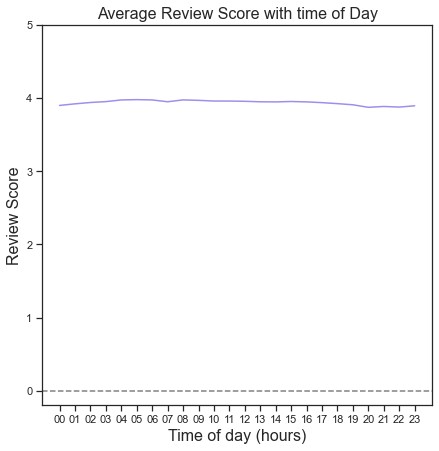

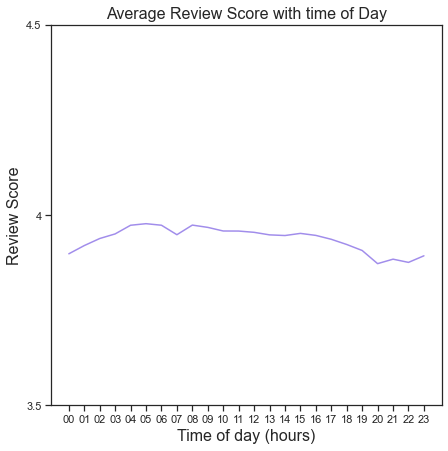

In [14]:
df_means = df.groupby('DayHour').mean()
df_means = pd.DataFrame(df_means).reset_index()
df_means = df_means.rename(columns={'index':'DayHour'})
df_means = df_means.sort_values('DayHour')

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(7, 7))
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
ax.plot(df_means['DayHour'], df_means['Score'], color='#A18DEB')

plt.yticks([0,1,2,3,4,5],
           [0,1,2,3,4,5])
plt.title('Average Review Score with time of Day', fontsize=16)
plt.xlabel('Time of day (hours)', fontsize=16)
plt.ylabel('Review Score', fontsize=16)

#zoom
fig, ax2 = plt.subplots(figsize=(7, 7))
ax2.plot(df_means['DayHour'], df_means['Score']-4, color='#A18DEB')

plt.yticks([-0.5,0,0.5],
           [3.5,4,4.5])
plt.title('Average Review Score with time of Day', fontsize=16)
plt.xlabel('Time of day (hours)', fontsize=16)
plt.ylabel('Review Score', fontsize=16)


The zoomed in graph gives some insight into whether or not the time of day has an impact on review ratings, but the effect is minimal and might be misleading, more data is required to come to a conclusion on this matter.

# Replies

In [15]:
#converting ReceivedReply from true/false to 1/0
conditions = [(df['ReceivedReply'] == 'True'),(df['ReceivedReply'] == 'False')]
values = ['1', '0']
df['ReceivedReply'] = np.select(conditions, values)

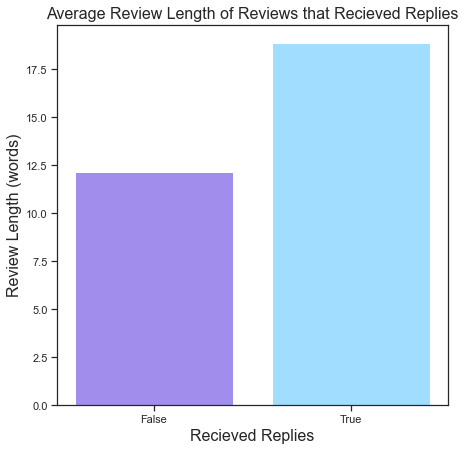

In [16]:
df_reply = df.groupby('ReceivedReply')['ReviewLength'].mean()
df_reply = pd.DataFrame(df_reply).reset_index()

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(7, 7))
plt.xticks([0,1],
           ['False','True'])
ax.bar(df_reply['ReceivedReply'], df_reply['ReviewLength'], color=['#A18DEB','#A1DDFF'])


plt.title('Average Review Length of Reviews that Recieved Replies', fontsize=16)
plt.xlabel('Recieved Replies', fontsize=16)
plt.ylabel('Review Length (words)', fontsize=16)
plt.show()

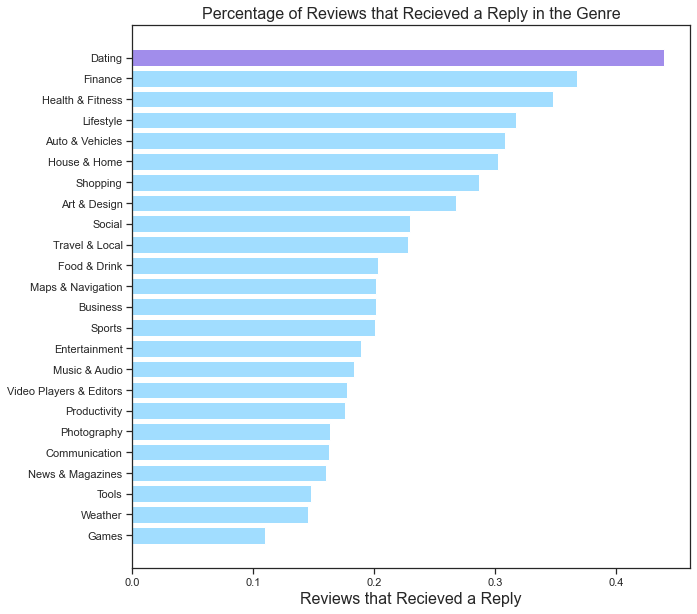

In [17]:
df['ReceivedReply'] = pd.to_numeric(df['ReceivedReply'], downcast="float")
df_reply2 = df.groupby('Genre').mean()
df_reply2 = pd.DataFrame(df_reply2).reset_index()
df_reply2 = df_reply2.sort_values('ReceivedReply')

colors = set_genre_colors(df_reply2,'Dating')

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(df_reply2['Genre'], df_reply2['ReceivedReply'], color=colors)
plt.title('Percentage of Reviews that Recieved a Reply in the Genre', fontsize=16)
plt.xlabel('Reviews that Recieved a Reply', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

# Common words in Reviews

In [18]:
#list to words
def listToWords(list_):
    return ' '.join(list_)

#additional stopwords to remove
def remove_stopwords(textList):
    result=[]
    
    for i in range(len(textList)):
        noAdd=False
        for ii in range(len(stop)):
            if(stop[ii] == textList[i]):
                noAdd=True
        if(noAdd==False):
            if(textList[i] not in result):
                result.append(textList[i])
    result = set(result)
    return list(result)


stop = ['really','one','get','would','even','much','need','well','make','use','want','every','good','bad','great',
              'apps','also','many','could','way','ever','phone','using','never','like','time','back','still','game',
             'worst','better','love','best','excellent','nice','terrible','give','super','far','got','go','see','play',
        'awesome','amazing','used','application','account','thanks','works','u']

df['ReviewTextTokenized'] = df['ReviewTextTokenized'].apply(remove_stopwords)



#all reviews
all_words = ' '.join([word for word in df['ReviewTextTokenized'].apply(listToWords)])

#separating out reviews
df_goodReviews = df.drop(df[df.Score <= 3].index)
df_badReviews = df.drop(df[df.Score >= 3].index)

#good reviews
good_words = ' '.join([word for word in df_goodReviews['ReviewTextTokenized'].apply(listToWords)])

#bad reviews
bad_words = ' '.join([word for word in df_badReviews['ReviewTextTokenized'].apply(listToWords)])

# All Reviews Common words

In [19]:
counter = Counter(all_words.split())
allReviews_most_common = counter.most_common(20)
allReviews_most_common

[('easy', 113059),
 ('work', 70458),
 ('please', 54935),
 ('update', 50616),
 ('new', 43131),
 ('fun', 41175),
 ('free', 38605),
 ('add', 37376),
 ('money', 37150),
 ('ads', 35786),
 ('working', 34947),
 ('find', 33721),
 ('cool', 33697),
 ('service', 33301),
 ('people', 32876),
 ('keep', 32833),
 ('always', 31916),
 ('fix', 31692),
 ('useful', 30720),
 ('know', 30352)]

# Good Review Common words

In [20]:
counter = Counter(good_words.split())
goodReviews_most_common = counter.most_common(20)
goodReviews_most_common

[('easy', 104079),
 ('fun', 32174),
 ('work', 28604),
 ('cool', 28044),
 ('useful', 26210),
 ('thank', 25927),
 ('simple', 24353),
 ('perfect', 23691),
 ('new', 22595),
 ('please', 22522),
 ('add', 22334),
 ('free', 21683),
 ('keep', 20857),
 ('find', 19508),
 ('everything', 18977),
 ('recommend', 18911),
 ('always', 18282),
 ('fast', 18239),
 ('ok', 18025),
 ('lot', 17838)]

# Bad Review Common words

In [21]:
counter = Counter(bad_words.split())
badReviews_most_common = counter.most_common(20)
badReviews_most_common

[('work', 30995),
 ('update', 24679),
 ('money', 21949),
 ('please', 20172),
 ('working', 16464),
 ('fix', 15189),
 ('pay', 14912),
 ('open', 14587),
 ('service', 14208),
 ('new', 14068),
 ('ads', 13517),
 ('try', 13400),
 ('useless', 12747),
 ('tried', 12603),
 ('free', 12253),
 ('keeps', 12073),
 ('people', 11795),
 ('waste', 11650),
 ('nothing', 11490),
 ('download', 11278)]

# Word Cloud

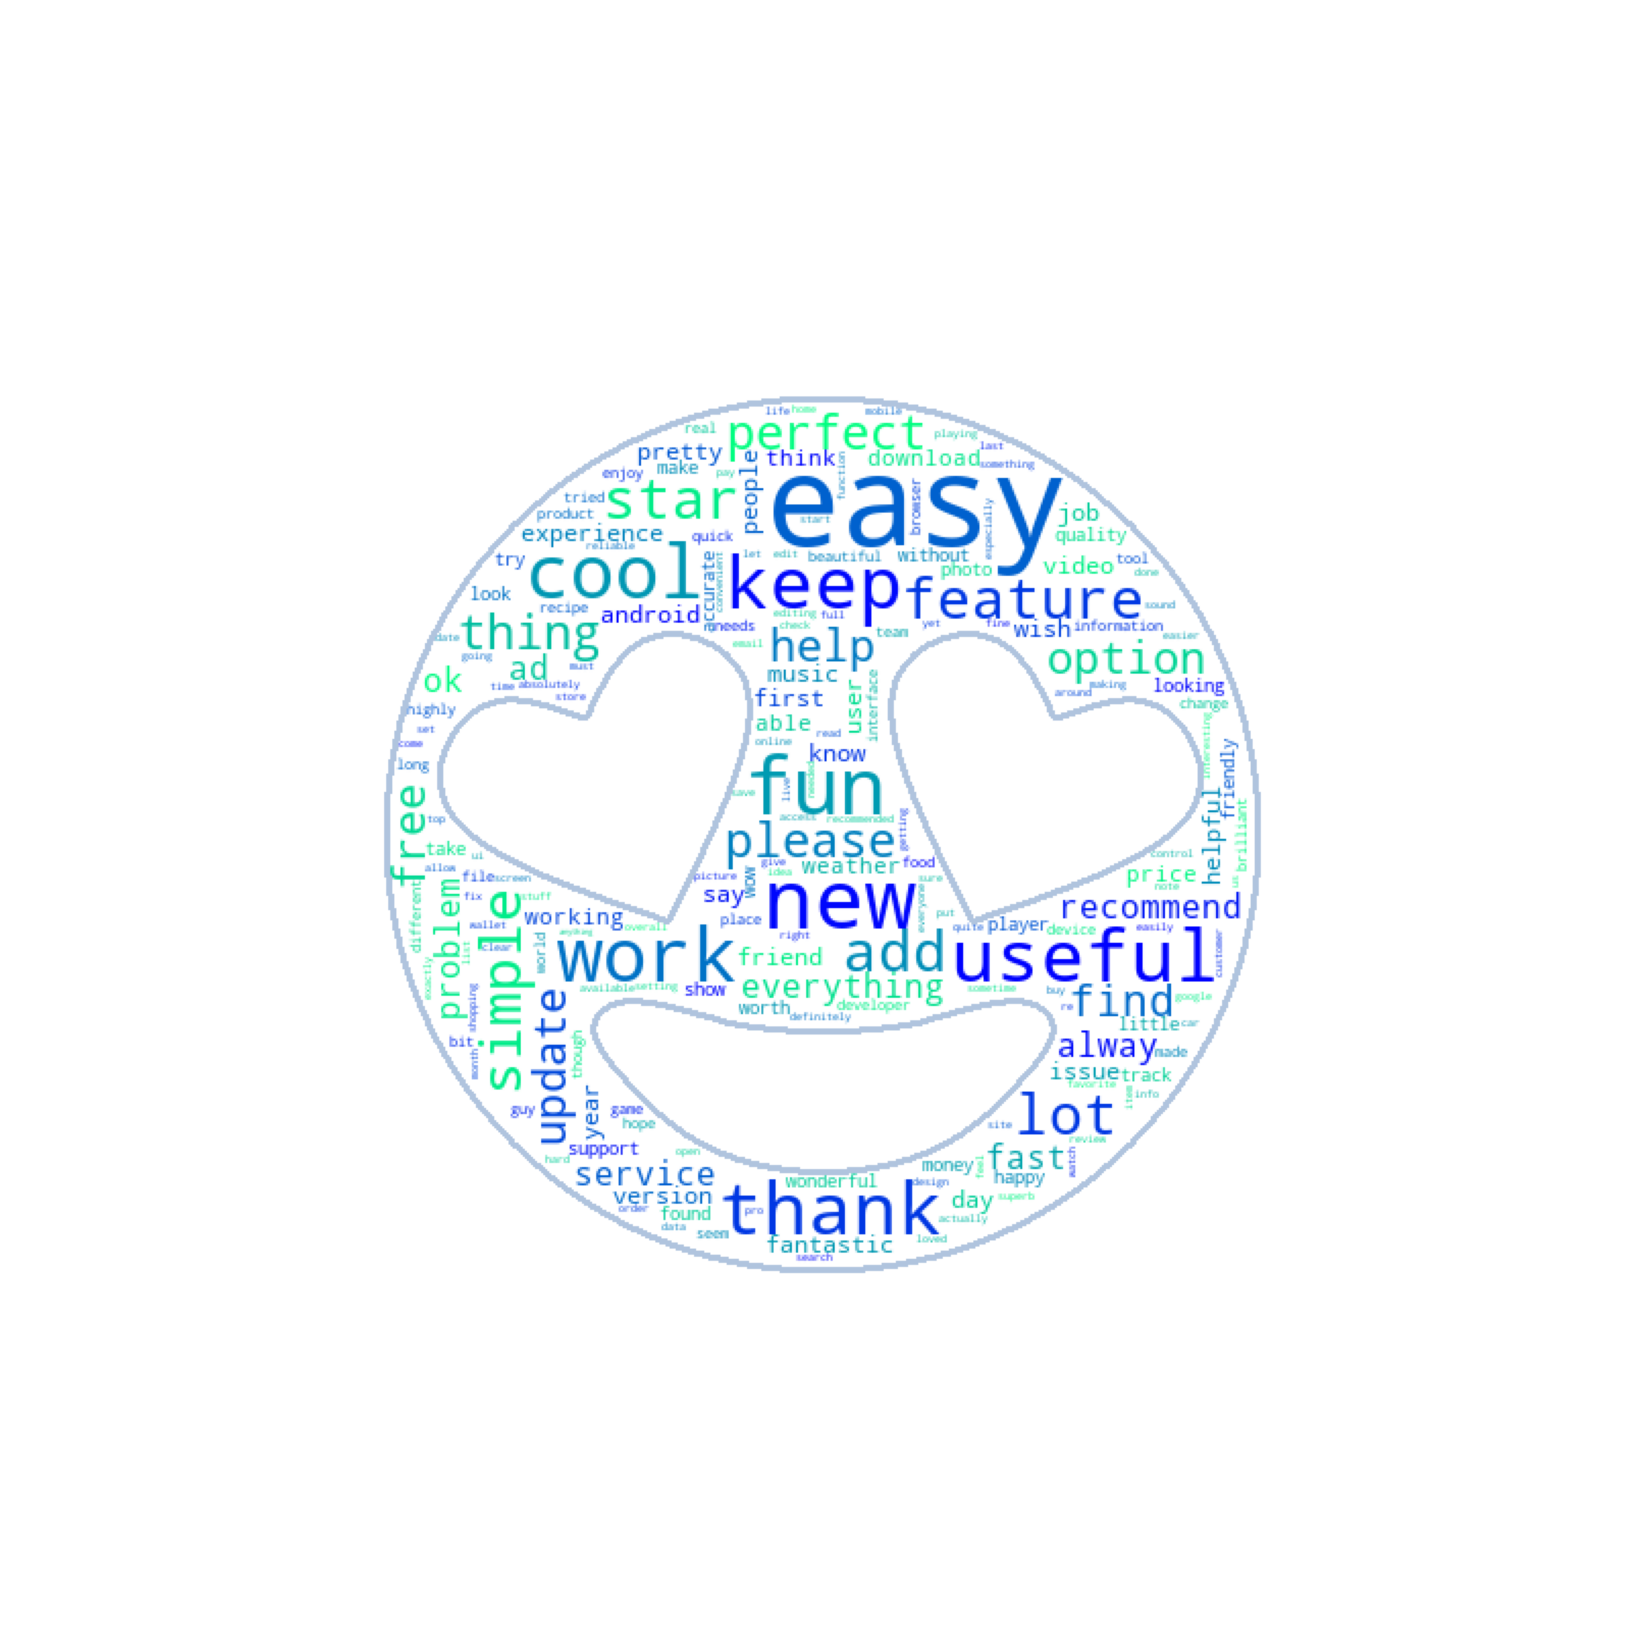

In [22]:
from PIL import Image
mask = np.array(Image.open("playstore1.png"))

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='winter', collocations=False, mask=maskable_image, contour_color='lightsteelblue', contour_width=2).generate(good_words)
wordcloud.to_file("goodCloud.png")
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud)

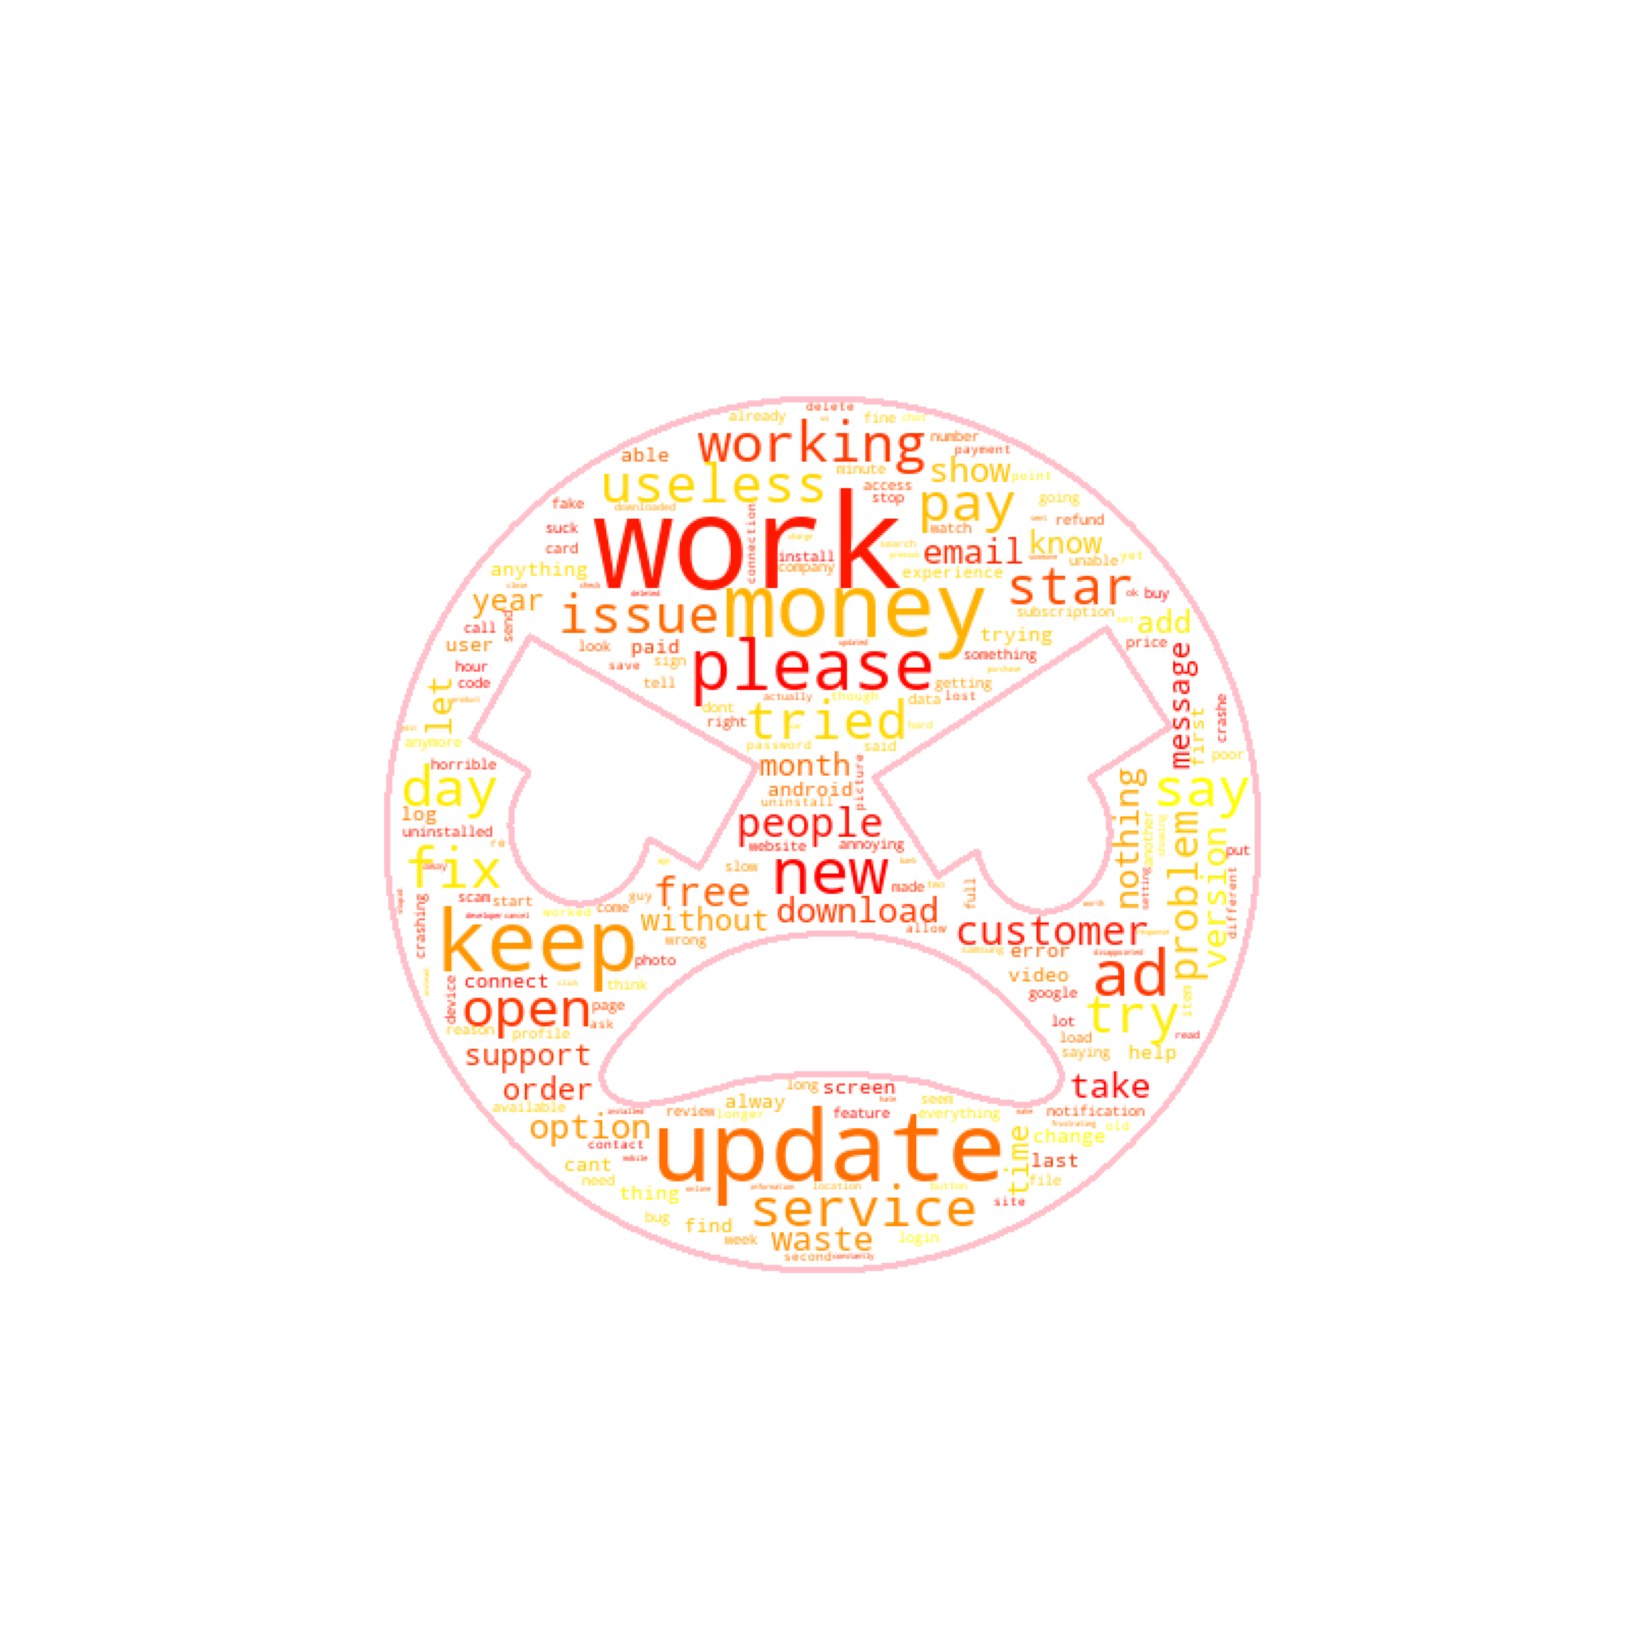

In [23]:
mask = np.array(Image.open("playstore2.png"))

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='autumn', collocations=False, mask=maskable_image, contour_color='pink', contour_width=2).generate(bad_words)
wordcloud.to_file("badCloud.png")
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud)

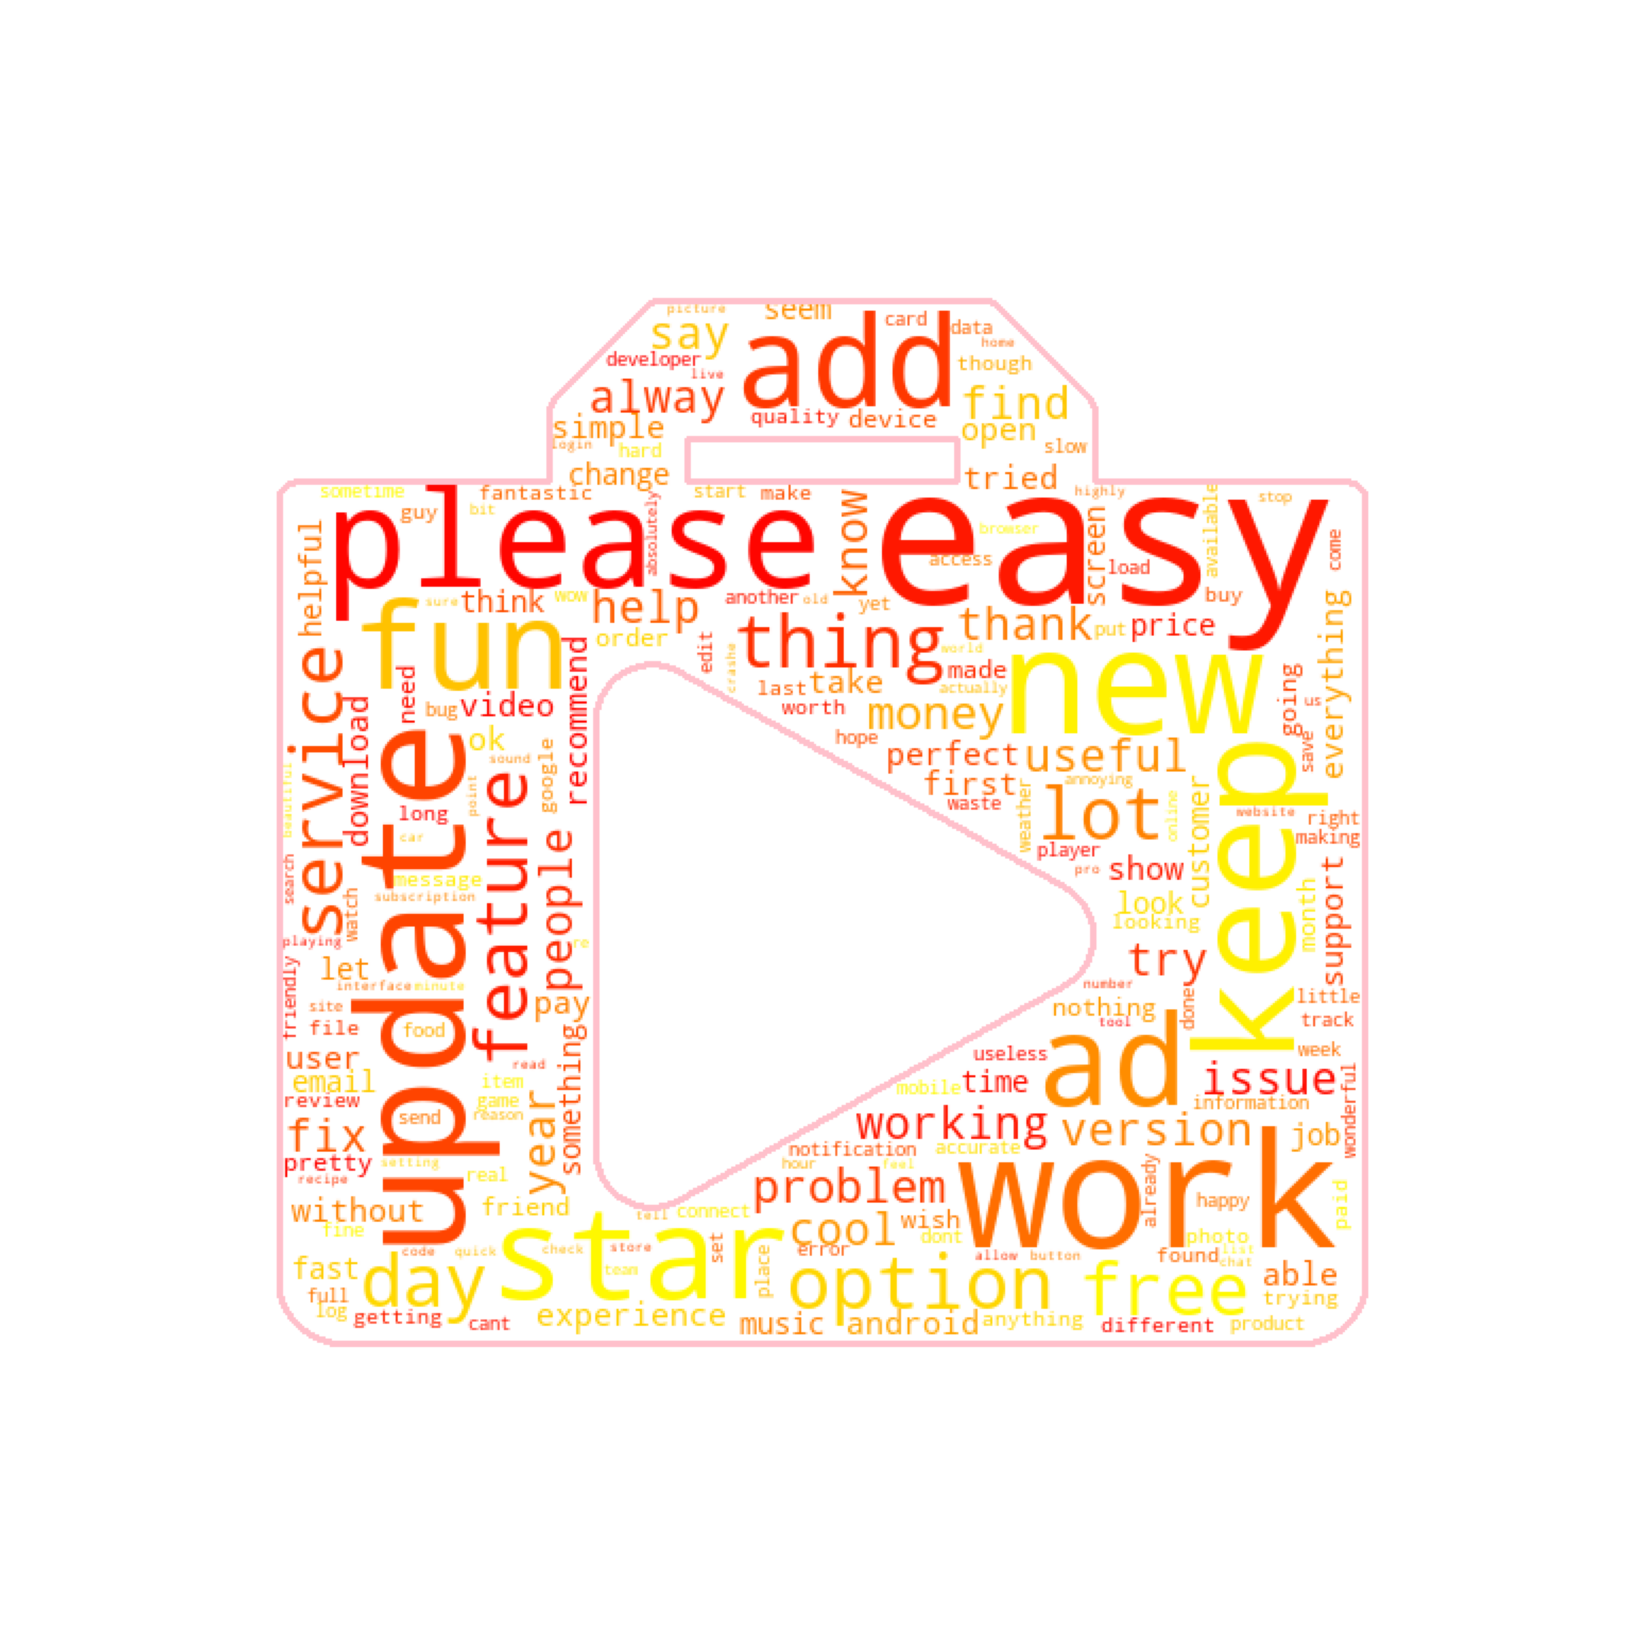

In [24]:
mask = np.array(Image.open("playstore.png"))

maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='autumn', collocations=False, mask=maskable_image, contour_color='pink', contour_width=2).generate(all_words)
wordcloud.to_file("badCloud.png")
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
plot_cloud(wordcloud)